## probability distributions exercises

In [2]:
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

1. 


A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?
- How likely is it that the drive through gets at least 1 car?

<BarContainer object of 12 artists>

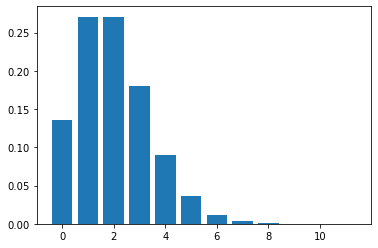

In [73]:
lambda_value = 2
bank_drive = stats.poisson(lambda_value)

x = np.arange(0,12)
y = bank_drive.pmf(x)
plt.bar(x,y)

In [3]:
# What is the probability that no cars drive up in the noon hour?
bank_drive.pmf(0)

0.1353352832366127

In [4]:
# What is the probability that 3 or more cars come through the drive through?
bank_drive.sf(2)

0.32332358381693654

In [5]:
# How likely is it that the drive through gets at least 1 car?
bank_drive.sf(0)

0.8646647167633873

2. 



Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?



In [6]:
mu = 3.0
sigma = 0.3
grade_dist = stats.norm(mu, sigma)

In [7]:
# What grade point average is required to be in the top 5% of the graduating class?
grade_dist.isf(0.05)

3.4934560880854417

In [8]:
# What GPA constitutes the bottom 15% of the class?
grade_dist.ppf(0.15)

2.689069983151863

In [9]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this 
# scholarship?
print(f"range of third decile: [{grade_dist.ppf(0.2)}, {grade_dist.ppf(0.3)}]") 
2.8 > grade_dist.ppf(0.2) and 2.8 < grade_dist.ppf(0.3)

range of third decile: [2.7475136299281258, 2.842679846187588]


True

In [82]:
# alt from class:
grade_dist.ppf([0.2, 0.3])
2.8 >= grade_dist.ppf([0.2, 0.3])[0] and 2.8 <= grade_dist.ppf([0.2, 0.3])[1]

True

In [83]:
# If I have a GPA of 3.5, what percentile am I in?
grade_dist.cdf(3.5)

0.9522096477271853

3. 


A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [31]:
# binomial distribution? : people click through or they don't 
# percent of success is 0.02
n_visitors = 4326
p_clickthrough = 0.02
click_dist = stats.binom(n_visitors, p_clickthrough)

In [30]:
click_dist.sf(96)

0.13975823631416445

In [90]:
#simulation
clicks = np.random.choice([0,1], size=(10_000, 4326), p = (1-0.02, 0.02))
(clicks.sum(axis=1) >= 97).mean()

0.1361

In [91]:
#poisson distribution
λ = n_visitors*p_clickthrough
poisson_clicks = stats.poisson(λ)
poisson_clicks.sf(96)

0.14211867659283192

4.



You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?



In [47]:
# using a binomial
answers_binom_dist = stats.binom(60, 0.01)
answers_binom_dist.sf(0)

0.45284335760923855

In [94]:
#simulations
((np.random.choice([0,1], size=(10_000, 60), p = (0.99, 0.01))).sum(axis = 1) > 0).mean()

0.4587

5.

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [95]:
# binomial
p_clean = 0.03
n_students = round(3*22*0.9)
cleaning_dist = stats.binom(n_students, p_clean)

In [96]:
# How likely is it that the break area gets cleaned up each day?
cleaning_dist.sf(0)

0.8342199288437352

In [106]:
# How likely is it that it goes two days without getting cleaned up?
cleaning_two_day = stats.binom(n_students*2, p_clean)
#both of these are basically the same
cleaning_two_day.cdf(0) 
cleaning_two_day.pmf(0)

0.027483031992576134

In [98]:
# All week?
cleaning_week = stats.binom(n_students*5, p_clean)
cleaning_week.cdf(0)

0.00012521651388091353

6. 


You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [112]:
queue_dist = stats.norm(15, 3)
# let x be the number of people in line then the total time to get food is 12+2x,
# this must be less than or equal 45 minutes
# can solve for the number of people: 12+2x <= 45 implies x <= 16.5
# therefore we need the probability that there are less than 18 people in line
queue_dist.cdf(16.5)

0.6914624612740131

In [113]:
#using minutes
queue_wait = stats.norm(15*2, 3*2)
queue_wait.cdf(33)

0.6914624612740131

7.


Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?


In [37]:
import env

In [39]:
query = '''
select avg(s.salary) as avg_salary, std(s.salary) as std_salary
	from employees as e
		join dept_emp as de using (emp_no)
        join salaries as s using (emp_no)
    where de.to_date > now() and s.to_date > now();
'''
info = pd.read_sql_query(query, env.get_db_url('employees'))

In [115]:
salary_dist = stats.norm(info['avg_salary'][0], info['std_salary'][0])

In [41]:
# What percent of employees earn less than 60,000?
salary_dist.cdf(60_000)

0.2438569709201618

In [42]:
# What percent of employees earn more than 95,000?
salary_dist.sf(95_000)

0.09208773564924777

In [118]:
# What percent of employees earn between 65,000 and 80,000?
salary_dist.cdf(80_000) - salary_dist.cdf(65_000)

0.3350612231883823

In [119]:
# What do the top 5% of employees make? 
salary_dist.isf(0.05)
#note: we are assuming that the salaries are a normal distribution, it might not be

100484.58529677246